$\textbf{Activity 1}$

In [8]:
from numpy import random
import matplotlib.pyplot as plt
from statistics import stdev
import numpy as np

x = random.uniform(0,1,size=10)
x_axis = range(1, 11)
def mean(array):
    mean_sum = 0
    for i in range(len(array)):
        mean_sum += array[i]
    N = len(array)
    mean = mean_sum/(N)
    return mean
    

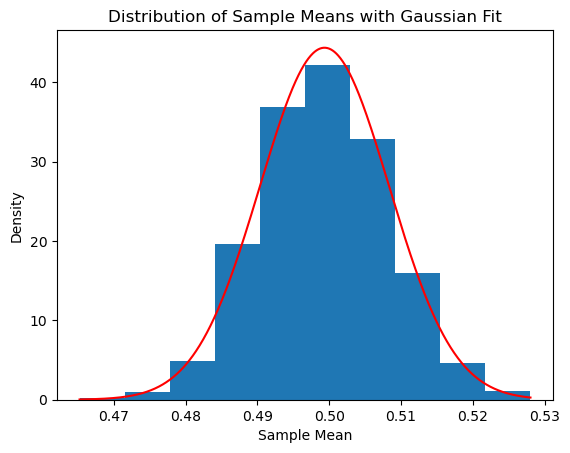

In [20]:
#creating an array of x_bars
xbars = []
for i in range(1000):
    new = random.uniform(0,1,size=1000)
    means_1 = mean(new) 
    xbars.append(means_1)
#print(xbars)
plt.hist(xbars, density=True) #what does tis do  
#print(xbars)
x_arr = np.linspace(1,100, num = 100)
#plt.plot(x_arr, generate_gaussian(xbars))


mu = mean(xbars)
sigma = stdev(xbars)
fit = []
x_arr = np.linspace(min(xbars), max(xbars), num=1000)
for xs in x_arr:
    g = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*((xs-mu)**2/(sigma)**2))
    fit.append(g)
    
plt.plot(x_arr, fit, 'r')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means with Gaussian Fit')
plt.show()

$\textbf{Activity 3}$

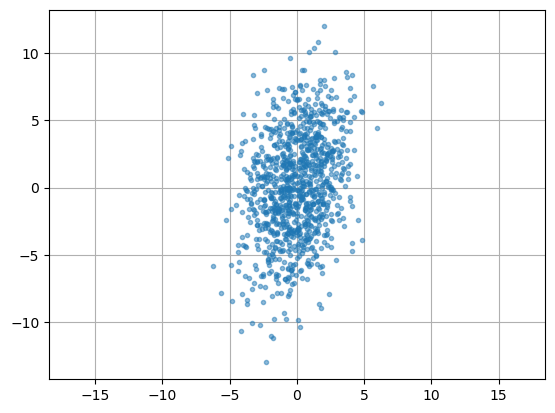

In [138]:
#1
cov = np.array([[4, 2], [2, 16]])
pts = np.random.multivariate_normal([0, 0], cov, size=1000)
plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

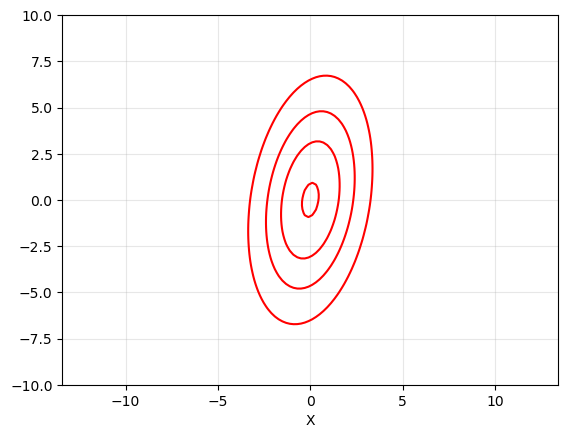

In [207]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = multivariate_normal([0, 0], cov)
Z = rv.pdf(pos)

plt.contour(X, Y, Z, levels=4, colors='red')

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.xlabel('X')
plt.show()

There was a graph I saw once in relation to the floods in Pakistan in 2022 which compared the amount of rain(mm) a city in the North of the country received anually over a period of some years. The amount of rain over the course of the monsoon season can be X in this case and Y can be the damages incurred. Y has more variation as do damages since they vary from case to case and can depend on different factors such as proximity to the flooded area, accessibility to warning systems and most importantly the nature of the damage. The two factors are also positively correlated, more rain equals more damage. 

$\textbf{Activity 5}$

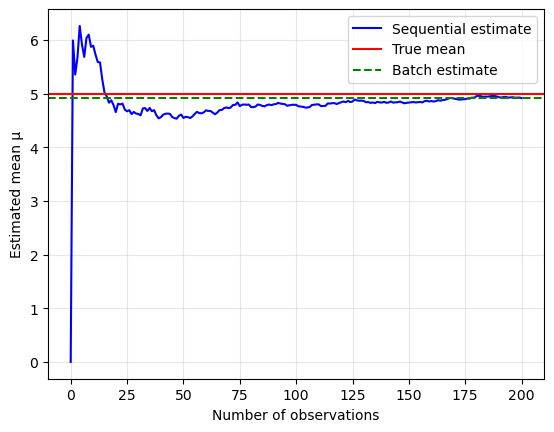

In [208]:
true_mean = 5.0
true_std = 2.0
N = 200

np.random.seed(42)
data = np.random.normal(true_mean, true_std, N)

mu_seq = 0  
mu_history = [mu_seq]

for x in data:
    n = len(mu_history) 
    mu_seq = mu_seq + (1.0/n) * (x - mu_seq)
    mu_history.append(mu_seq)

mu_batch = np.mean(data)


plt.plot(mu_history, 'b-', label='Sequential estimate')
plt.axhline(y=true_mean, color='r', linestyle='-', label='True mean')
plt.axhline(y=mu_batch, color='g', linestyle='--', label='Batch estimate')
plt.xlabel('Number of observations')
plt.ylabel('Estimated mean μ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



The sequential estimation demonstrates concepts of bias in maximum likelihood estimators. The sequential update for the mean, μ_new = μ_old + (1/n)(x_n - μ_old), provides an unbiased estimate at every step. The maximum likelihood estimator is known to be biased as it systematically underestimates the true covariance, particularly for small sample sizes. This bias arises because the estimator uses the estimated mean rather than the true mean. A remedy is in applying Bessel's correction which adjusts for this lost degree of freedom. The sequential algorithm naturally reveals this bias correction through its incremental updates, showing how the estimate evolves and converges to the unbiased value as more data points are processed.

$\textbf{Activity 6}$

Writing relevant equations from Bishop,$\newline$
$\begin{align*}
    \mathscr{N}(x|\mu, \sigma^2) = \frac{1}{(2\pi)^\frac{1}{2}\sigma}\exp\bigg\{{-\frac{1}{2\sigma^2}(x-\mu)^2}\bigg\}
\end{align*}$, $\newline$
$\begin{align*}
    p(x|\mu,\sigma^2) = \prod_{n=1}^{N} \mathscr{N}(x_n|\mu, \sigma^2)
\end{align*}
$ and, $\newline$
$\ln p(\textbf{x}|\mu,\sigma^2) = -\frac{1}{2\sigma^2}\sum_{i=1}^{N} (x_i-\mu)^2 - \frac{N}{2} \ln \sigma^2 - \frac{N}{2} \ln(2 \pi)$

In [185]:
#1
x_n = np.linspace(1,100, num = 20) #no specification other then it should be normal
sigma_6 = 30
mu_6 = 80
normal = []
l = 1
for xs in x_n:
    h = (1/(sigma_6*np.sqrt(2*np.pi)))*np.exp((-1/2)*((xs-mu_6)**2/(sigma_6)**2))
    l = l*h
    normal.append(h)

Text(0, 0.5, 'Log Likelihood')

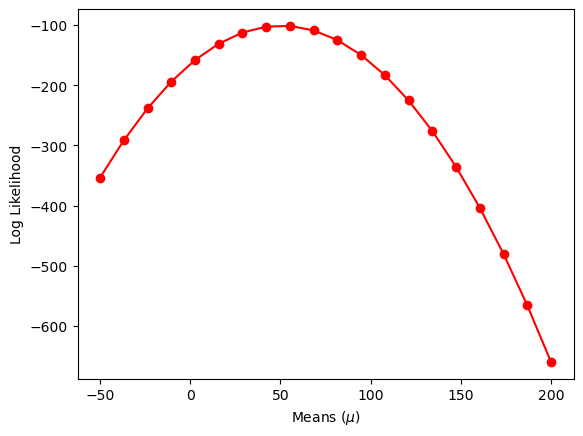

In [203]:
#2
x_n = np.linspace(1,100, num = 20)
means = np.linspace(-50, 200, 20)
loglikelihoods = []

N = 20
for m in means:
    likelihood = 0
    sum_1 = 0
    for xs in x_n:
        sum_1 += (xs-m)**2
    log_likelihood = (-1/(2*sigma_6**2))*sum_1 - N/2*np.log(sigma_6**2) -N/2*np.log(2*np.pi)
    loglikelihoods.append(log_likelihood)
  
#3

plt.plot(means,loglikelihoods,'r-o')
plt.xlabel('Means ($\mu$)')
plt.ylabel('Log Likelihood')

In [195]:
max_value = max(loglikelihoods)
print('The maximum log likelihood happens at a mean of', means[loglikelihoods.index(max_value)], 'with a value', max_value)

The maximum log likelihood happens at a mean of 55.263157894736835 with a value -806.0694452852507


In [196]:
#finding maximum likelihood solution
total = 0
for xs in x_n:
    total = total + xs
max_mu = total/len(x_n)    

In [197]:
print(max_mu)

50.49999999999999


Text(0, 0.5, 'Log Likelihood')

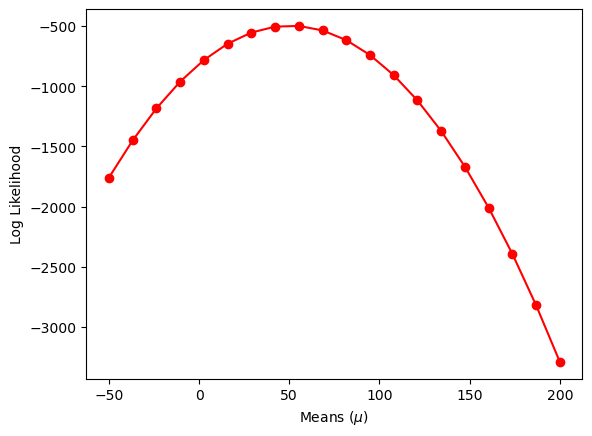

In [204]:
x_n = np.linspace(1,100, num = 100)
means = np.linspace(-50, 200, 20)
loglikelihoods = []

N = 100
for m in means:
    likelihood = 0
    sum_1 = 0
    for xs in x_n:
        sum_1 += (xs-m)**2
    log_likelihood = (-1/(2*sigma_6**2))*sum_1 - N/2*np.log(sigma_6**2) -N/2*np.log(2*np.pi)
    loglikelihoods.append(log_likelihood)
  
#3

plt.plot(means,loglikelihoods,'r-o')
plt.xlabel('Means ($\mu$)')
plt.ylabel('Log Likelihood')

Text(0, 0.5, 'Log Likelihood')

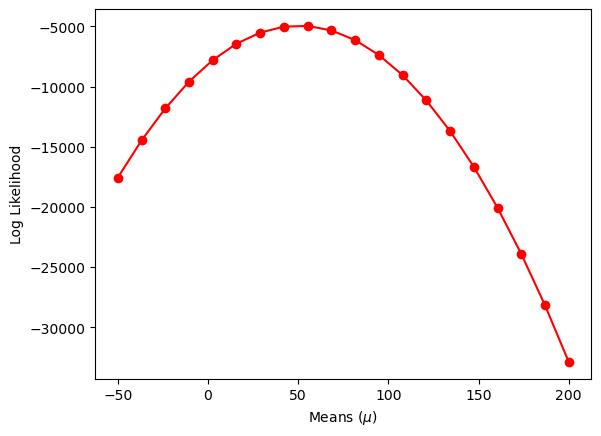

In [205]:
x_n = np.linspace(1,100, num = 1000)
means = np.linspace(-50, 200, 20)
loglikelihoods = []

N = 1000
for m in means:
    likelihood = 0
    sum_1 = 0
    for xs in x_n:
        sum_1 += (xs-m)**2
    log_likelihood = (-1/(2*sigma_6**2))*sum_1 - N/2*np.log(sigma_6**2) -N/2*np.log(2*np.pi)
    loglikelihoods.append(log_likelihood)
  
#3

plt.plot(means,loglikelihoods,'r-o')
plt.xlabel('Means ($\mu$)')
plt.ylabel('Log Likelihood')

From prior knowledge the uncertainties scale as: $\newline$
Standard error ∝ $\frac{1}{\sqrt{N}}$ $\newline$
Variance ∝ $\frac{1}{N}$.  
In the two graphs, with a bigger N the parabola seems to get pushed down more and that can be interpreted perhaps as the width of the parabola decreasing. This is in line with what we expect theoretically.